In [1]:
import pandas as pd 

In [3]:
df = pd.read_csv("./titanic.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
num_cols = df.select_dtypes(exclude='object').columns.tolist()
df = df[num_cols]
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [24]:
hue = 'Survived'

In [26]:
X = df[num_cols]
y = df.pop(hue)
#X = df.drop('Survived', axis = 1)
X

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,27.0,0,0,13.0000
887,888,1,1,19.0,0,0,30.0000
888,889,0,3,NaN,1,2,23.4500
889,890,1,1,26.0,0,0,30.0000


In [27]:
if hue in num_cols:
    columns_len = len(num_cols)-1 
else:
    columns_len = len(num_cols)
print(columns_len)

6


In [29]:
data_n_2 = (X - X.mean()) / (X.std())
data = pd.concat([y,data_n_2.iloc[:,0:columns_len]],axis=1)
data

,Survived,PassengerId,Survived,Pclass,Age,SibSp,Parch
0,0,-1.729137,-0.788829,0.826913,-0.530005,0.432550,-0.473408
1,1,-1.725251,1.266279,-1.565228,0.571430,0.432550,-0.473408
2,1,-1.721365,1.266279,0.826913,-0.254646,-0.474279,-0.473408
3,1,-1.717480,1.266279,-1.565228,0.364911,0.432550,-0.473408
4,0,-1.713594,-0.788829,0.826913,0.364911,-0.474279,-0.473408
...,...,...,...,...,...,...,...
886,0,1.713594,-0.788829,-0.369158,-0.185807,-0.474279,-0.473408
887,1,1.717480,1.266279,-1.565228,-0.736524,-0.474279,-0.473408
888,0,1.721365,-0.788829,0.826913,NaN,0.432550,2.007806
889,1,1.725251,1.266279,-1.565228,-0.254646,-0.474279,-0.473408


In [30]:
data.describe()

,Survived,PassengerId,Survived,Pclass,Age,SibSp,Parch
count,891.000000,8.910000e+02,8.910000e+02,8.910000e+02,7.140000e+02,8.910000e+02,8.910000e+02
mean,0.383838,6.379733e-17,-1.794300e-17,-7.575933e-17,2.338621e-16,3.588600e-17,4.585433e-17
std,0.486592,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,0.000000,-1.729137e+00,-7.888293e-01,-1.565228e+00,-2.015566e+00,-4.742788e-01,-4.734077e-01
25%,0.000000,-8.645684e-01,-7.888293e-01,-3.691575e-01,-6.590796e-01,-4.742788e-01,-4.734077e-01
50%,0.000000,0.000000e+00,-7.888293e-01,8.269128e-01,-1.169668e-01,-4.742788e-01,-4.734077e-01
75%,1.000000,8.645684e-01,1.266279e+00,8.269128e-01,5.714304e-01,4.325504e-01,-4.734077e-01
max,1.000000,1.729137e+00,1.266279e+00,8.269128e-01,3.462699e+00,6.780355e+00,6.970233e+00


In [36]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [37]:
X = X.drop(hue, axis=1)

In [38]:
data.shape

(891, 7)

In [39]:
data = pd.melt(data,id_vars= y.name,
                    var_name="features",
                    value_name='value')

ValueError: Per-column arrays must each be 1-dimensional

In [19]:
data

,Survived,features,value
0,0,PassengerId,-1.729137
1,1,PassengerId,-1.725251
2,1,PassengerId,-1.721365
3,1,PassengerId,-1.717480
4,0,PassengerId,-1.713594
...,...,...,...
5341,0,Fare,-0.386454
5342,1,Fare,-0.044356
5343,0,Fare,-0.176164
5344,1,Fare,-0.044356


<AxesSubplot:xlabel='features', ylabel='value'>

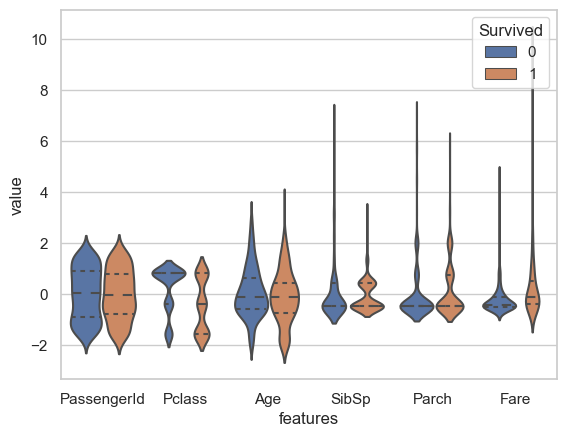

In [22]:
seaborn.violinplot(x="features", y="value", hue= y.name, data=data,split=False, inner="quart")

<AxesSubplot:xlabel='timepoint', ylabel='signal'>

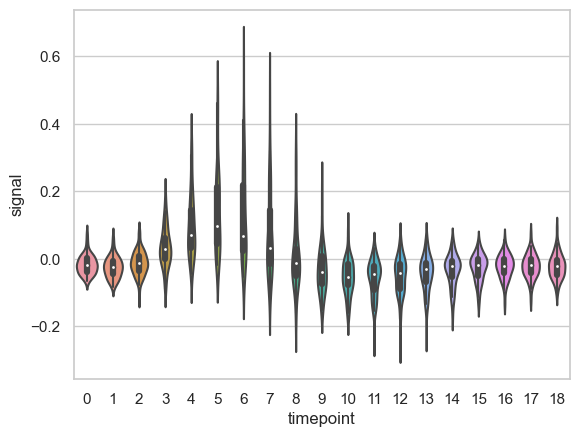

In [6]:
import seaborn
    
    
seaborn.set(style = 'whitegrid')
fmri = seaborn.load_dataset("fmri")
    
seaborn.violinplot(x ="timepoint",
             y ="signal",
             data = fmri)

In [7]:
fmri

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970
...,...,...,...,...,...
1059,s0,8,cue,frontal,0.018165
1060,s13,7,cue,frontal,-0.029130
1061,s12,7,cue,frontal,-0.004939
1062,s11,7,cue,frontal,-0.025367
